In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from math import sqrt


df = pd.read_csv('kc_house_data.csv')

In [8]:
# #Data Analysis for features selection (numerical only)

features = [col for col in df.columns if col not in ['price','date']]

# # Plot the scatter plot
# plt.figure(figsize=(15, 60))

# for i, feature in enumerate(features, 1):
#     plt.subplot(len(features), 2, i)
    
#     # Scatter plot
#     plt.scatter(df[feature], df['price'], color='blue')
    
#     plt.title(f'Scatter plot between {feature} and Price')
#     plt.xlabel(feature)
#     plt.ylabel('Price')
#     plt.grid(True)

# plt.tight_layout()
# plt.show()

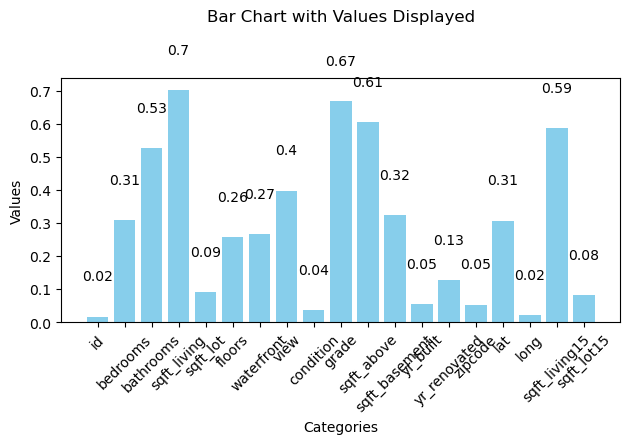

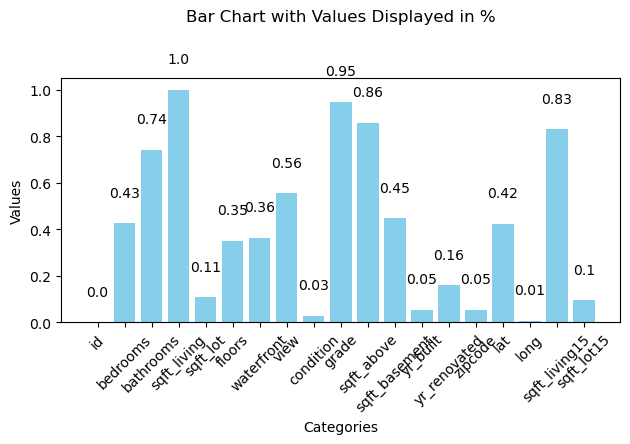

In [9]:
# Loop through each feature and calculate covariance with 'price'
corr = {}
for feature in features:
    correl = df['price'].corr(df[feature])
    corr[feature] = np.abs(correl)

# Display the covariances
# for feature, correl in corr.items():
#     print(f"Correlation coefficient between {feature} and Price: {correl}")
    
# visualizing all the corr of those features and price
# Extracting keys and values from the dictionary
features = list(corr.keys())
values = np.abs(list(corr.values()))
min_val = min(values)
max_val = max(values)


#Scaling those corr coef from 0 to 1 for choosing features
scaled_values = [(x - np.abs(min_val)) / (np.abs(max_val) - np.abs(min_val)) for x in values]
value_dict = {original: scaled for original, scaled in zip(values, scaled_values)}

#plotting bar chart

# plt.figure(figsize=(10, 6))
# plt.bar(features, np.abs(values), color='blue', edgecolor='black')
# plt.xlabel('Values')
# plt.ylabel('Magnitude')
# plt.title('Original corr coef between features and price')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.bar(features, value_dict.values(), color='skyblue', edgecolor='black')
# plt.xlabel('Values')
# plt.ylabel('Magnitude')
# plt.title('Original corr coef between features and price')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Display the exact value on top of each bar
bars = plt.bar(features, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), 
             ha='center', va='bottom')  # ha and va stand for the horizontal and vertical alignment
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart with Values Displayed',y=1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bars = plt.bar(features, value_dict.values(), color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), 
             ha='center', va='bottom')  # ha and va stand for the horizontal and vertical alignment
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart with Values Displayed in %',y=1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# for key, value in value_dict.items():
#     print(f"{key}: {value}")
# print()
# for key, value in corr.items():
#     print(f"{key}: {value}")

#SELECTING THE FEATURE BASED ON THE CORR COEF
selected_feature = []
for key,value in value_dict.items():
        if value >= 0.01:
            for key1, value1 in corr.items():
                if value1 == key:
                    selected_feature.append(key1)
                    break
# print(selected_feature)

In [10]:
# CHECKING IF DATE HAS ANY EFFECT ON PRICE



df['year'] = df['date'].str[:4].astype(int)
df['month'] = df['date'].str[4:6].astype(int)


import seaborn as sns
# plt.figure(figsize=(12, 7))
# sns.boxplot(x='year', y='price', data=df)
# plt.title('House Prices by Month')
# plt.xlabel('Month')
# plt.ylabel('Price')
# plt.show()

# avg_prices = df.groupby('month')['price'].mean()

# # Create a bar plot
# plt.figure(figsize=(12, 7))
# sns.barplot(x=avg_prices.index, y=avg_prices.values, color='skyblue')
# plt.title('Average House Prices by Month')
# plt.xlabel('Month')
# plt.ylabel('Average Price')
# plt.show()

# plt.figure(figsize=(12, 7))
# sns.boxplot(x='month', y='price', hue='year', data=df)
# plt.title('House Prices by Month and Year')
# plt.xlabel('Month')
# plt.ylabel('Price')
# plt.show()
    

In [11]:
# Not so many different in price between month in two years

## Training and fitting with 3 models

In [12]:
# Split data for training and test

df.drop_duplicates()
df.fillna(value=df.mean(numeric_only=True), inplace=True)

x = df[selected_feature]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)
# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

# # Reshape y_train and y_test
# y_train = y_train.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)

# # Create a scaler object
# scaler = StandardScaler()

# # Fit on y_train data and transform y_train
# y_train_scaled = scaler.fit_transform(y_train)

# # Transform y_test data using the scaler fitted on y_train
# y_test_scaled = scaler.transform(y_test)

122125.29746229843


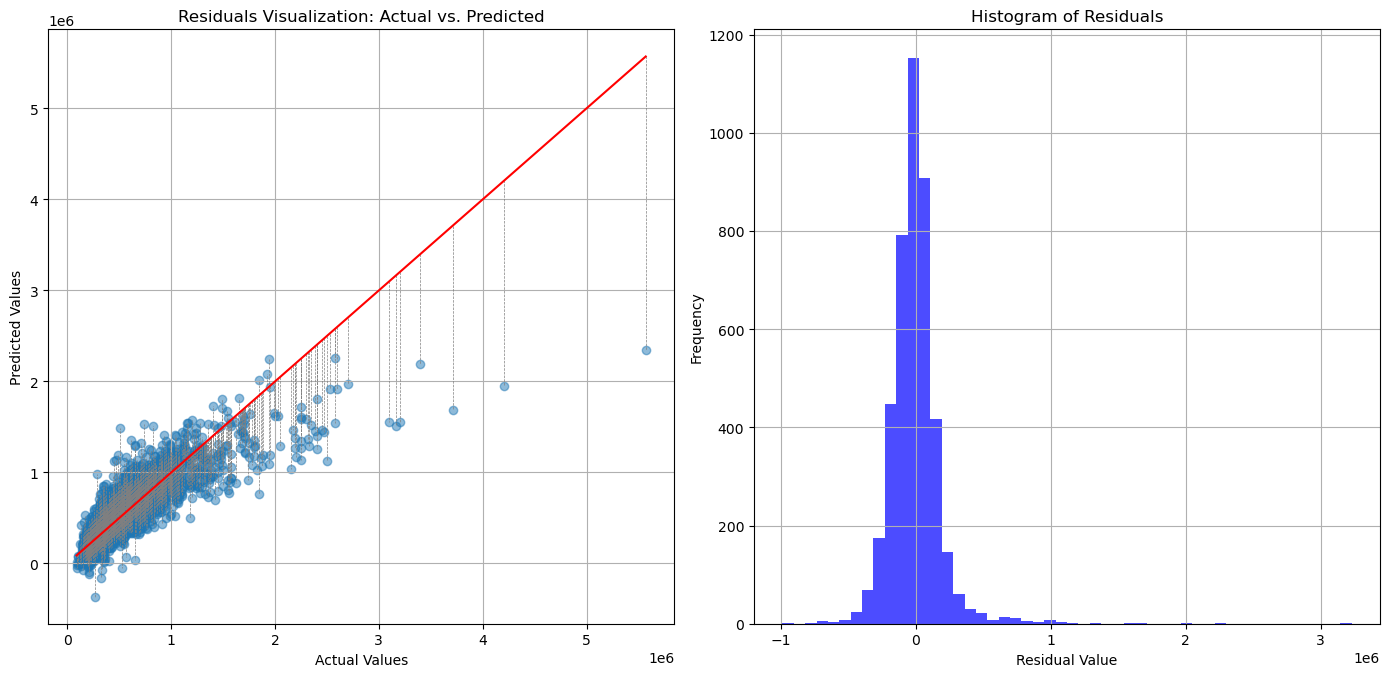

In [13]:
#Linear Regression
model = LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred1 = model.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_pred1))


import matplotlib.gridspec as gridspec
residuals = [actual - predicted for actual, predicted in zip(y_test, y_pred1)]

# Create figure and define grid
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

# Main scatter plot
ax0 = plt.subplot(gs[0])
ax0.scatter(y_test, y_pred1, alpha=0.5)
for actual, predicted in zip(y_test, y_pred1):
    ax0.plot([actual, actual], [actual, predicted], color='gray', linestyle='--', linewidth=0.5)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax0.set_title('Residuals Visualization: Actual vs. Predicted')
ax0.set_xlabel('Actual Values')
ax0.set_ylabel('Predicted Values')
ax0.grid(True)

# Histogram of residuals
ax1 = plt.subplot(gs[1])
ax1.hist(residuals, bins=50, color='blue', alpha=0.7)
ax1.set_title('Histogram of Residuals')
ax1.set_xlabel('Residual Value')
ax1.set_ylabel('Frequency')
ax1.grid(True)

plt.tight_layout()
plt.show()

86917.900410047


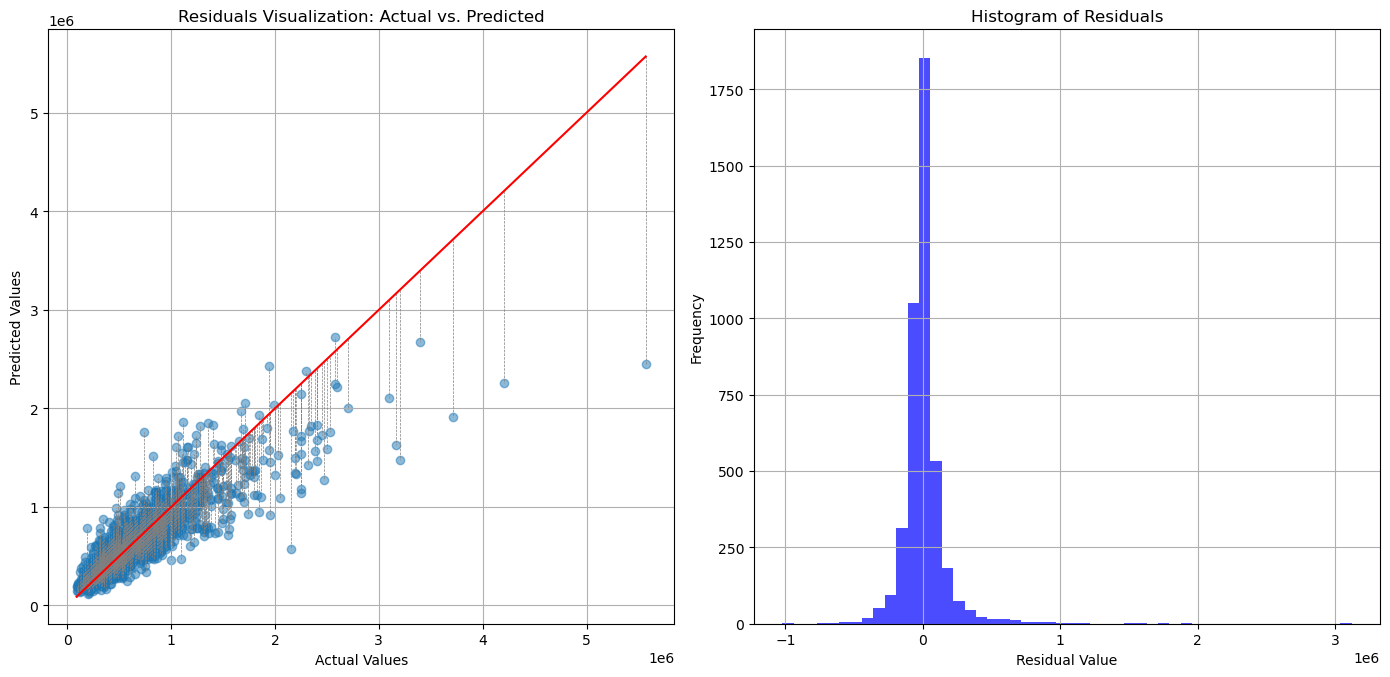

In [14]:
#KNN Regressor
K_nn = KNeighborsRegressor(n_neighbors=10,weights='distance')
K_nn.fit(x_train_scaled, y_train)
y_pred2 = K_nn.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_pred2))

# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred2, color='blue')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # a red line for perfect prediction
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(10, 8))

# # Scatter plot
# plt.scatter(y_test, y_pred2, alpha=0.5)

# # Drawing vertical lines to the red line
# for actual, predicted in zip(y_test, y_pred2):
#     plt.plot([actual, actual], [actual, predicted], color='gray', linestyle='--', linewidth=0.5)

# # Red line for perfect prediction
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# plt.title('Residuals Visualization: Actual vs. Predicted')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.grid(True)
# plt.show()

import matplotlib.gridspec as gridspec
residuals = [actual - predicted for actual, predicted in zip(y_test, y_pred2)]

# Create figure and define grid
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

# Main scatter plot
ax0 = plt.subplot(gs[0])
ax0.scatter(y_test, y_pred2, alpha=0.5)
for actual, predicted in zip(y_test, y_pred2):
    ax0.plot([actual, actual], [actual, predicted], color='gray', linestyle='--', linewidth=0.5)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax0.set_title('Residuals Visualization: Actual vs. Predicted')
ax0.set_xlabel('Actual Values')
ax0.set_ylabel('Predicted Values')
ax0.grid(True)

# Histogram of residuals
ax1 = plt.subplot(gs[1])
ax1.hist(residuals, bins=50, color='blue', alpha=0.7)
ax1.set_title('Histogram of Residuals')
ax1.set_xlabel('Residual Value')
ax1.set_ylabel('Frequency')
ax1.grid(True)

plt.tight_layout()
plt.show()


102412.1282674069


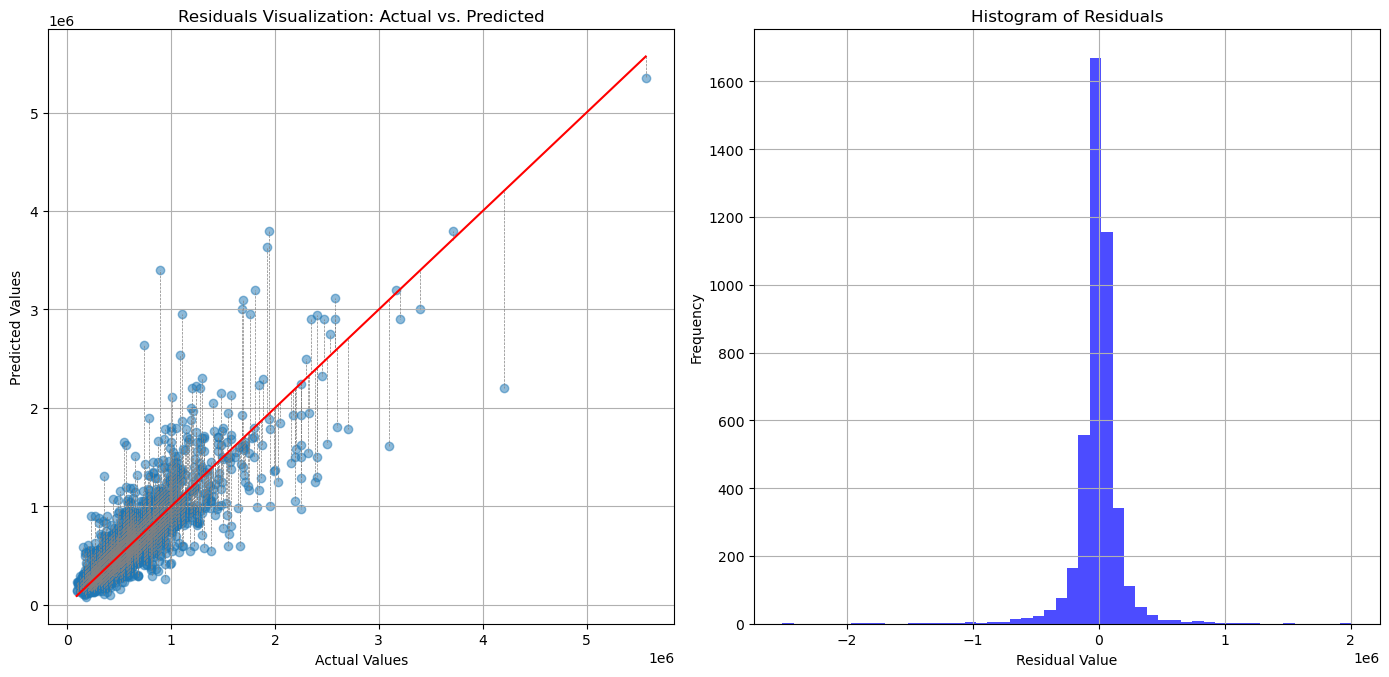

In [15]:
#Decision Tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train_scaled,y_train)
y_pred3 = clf.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_pred3)) 




import matplotlib.gridspec as gridspec
residuals = [actual - predicted for actual, predicted in zip(y_test, y_pred3)]

# Create figure and define grid
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

# Main scatter plot
ax0 = plt.subplot(gs[0])
ax0.scatter(y_test, y_pred3, alpha=0.5)
for actual, predicted in zip(y_test, y_pred3):
    ax0.plot([actual, actual], [actual, predicted], color='gray', linestyle='--', linewidth=0.5)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax0.set_title('Residuals Visualization: Actual vs. Predicted')
ax0.set_xlabel('Actual Values')
ax0.set_ylabel('Predicted Values')
ax0.grid(True)

# Histogram of residuals
ax1 = plt.subplot(gs[1])
ax1.hist(residuals, bins=50, color='blue', alpha=0.7)
ax1.set_title('Histogram of Residuals')
ax1.set_xlabel('Residual Value')
ax1.set_ylabel('Frequency')
ax1.grid(True)

plt.tight_layout()
plt.show()

## how the feature selection impact mae

In [16]:
# Feature selection impact the mae
numbers = list(np.linspace(0, 0.99, 20))
mae_linreg = []
mae_knn = []
mae_detree = []
df.drop_duplicates()
df.fillna(value=df.mean(numeric_only=True), inplace=True)
for i in numbers:
    selected_feature = []
    for key,value in value_dict.items():
        if value >= i:
            for key1, value1 in corr.items():
                if value1 == key:
                    selected_feature.append(key1)
                    break
    
    # Split data for training and test
    x = df[selected_feature]
    y = df['price']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(x_train)
    # x_test_scaled = scaler.transform(x_test)
    standard_scaler = StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)
    x_test_scaled = standard_scaler.transform(x_test)
    
    #Model apply
    model = LinearRegression()
    model.fit(x_train_scaled,y_train)
    y_pred1 = model.predict(x_test_scaled)
    mae_linreg.append(mean_absolute_error(y_test,y_pred1))
    
    K_nn = KNeighborsRegressor(n_neighbors=10,weights='distance')
    K_nn.fit(x_train_scaled, y_train)
    y_pred2 = K_nn.predict(x_test_scaled)
    mae_knn.append(mean_absolute_error(y_test,y_pred2))
    
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(x_train_scaled,y_train)
    y_pred3 = clf.predict(x_test_scaled)
    mae_detree.append(mean_absolute_error(y_test,y_pred3))

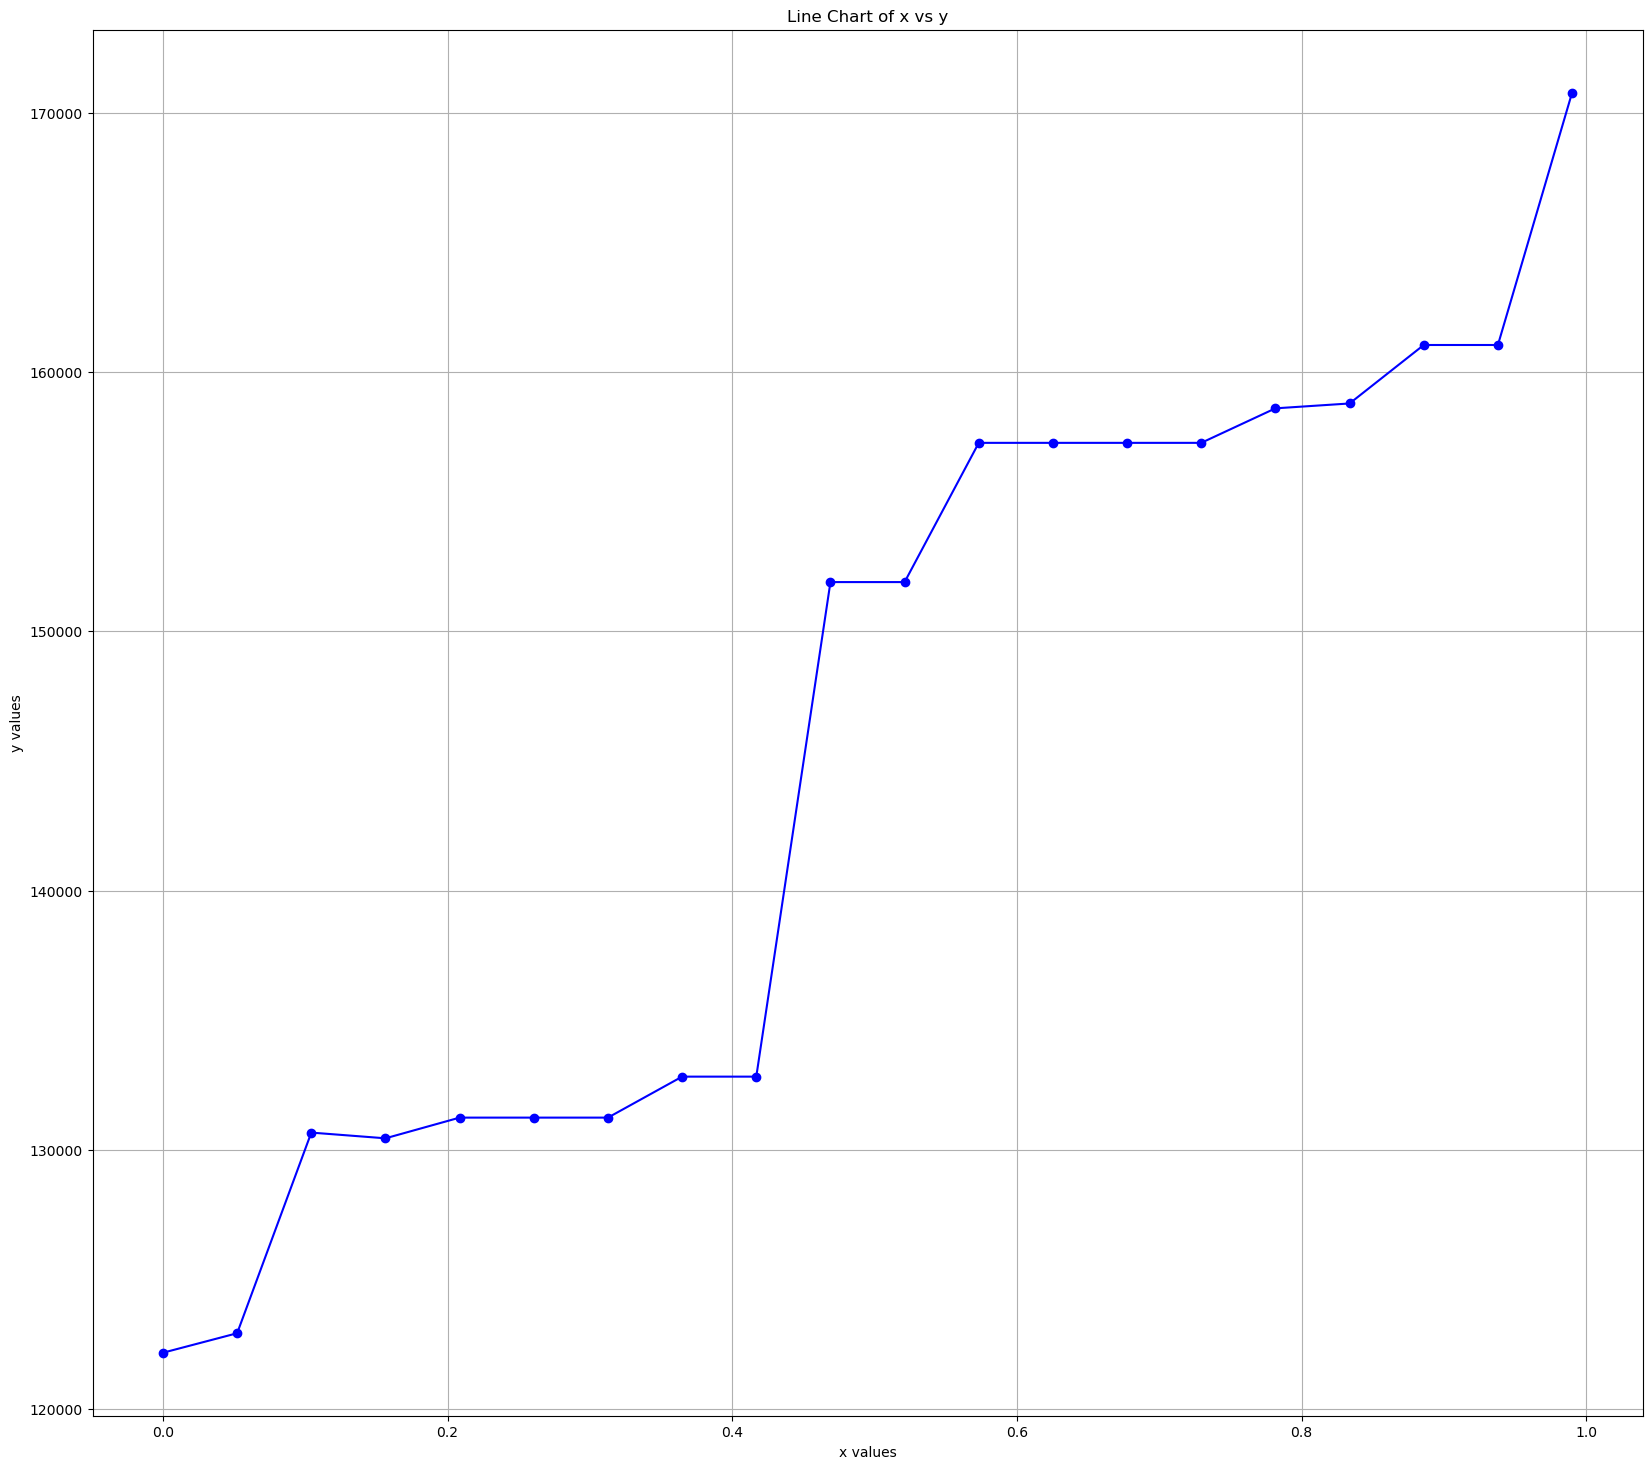

In [17]:
plt.figure(figsize=(20, 18))
plt.plot(numbers, mae_linreg, 'o-', color='blue')
plt.title('Line Chart of x vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid(True)
plt.show()

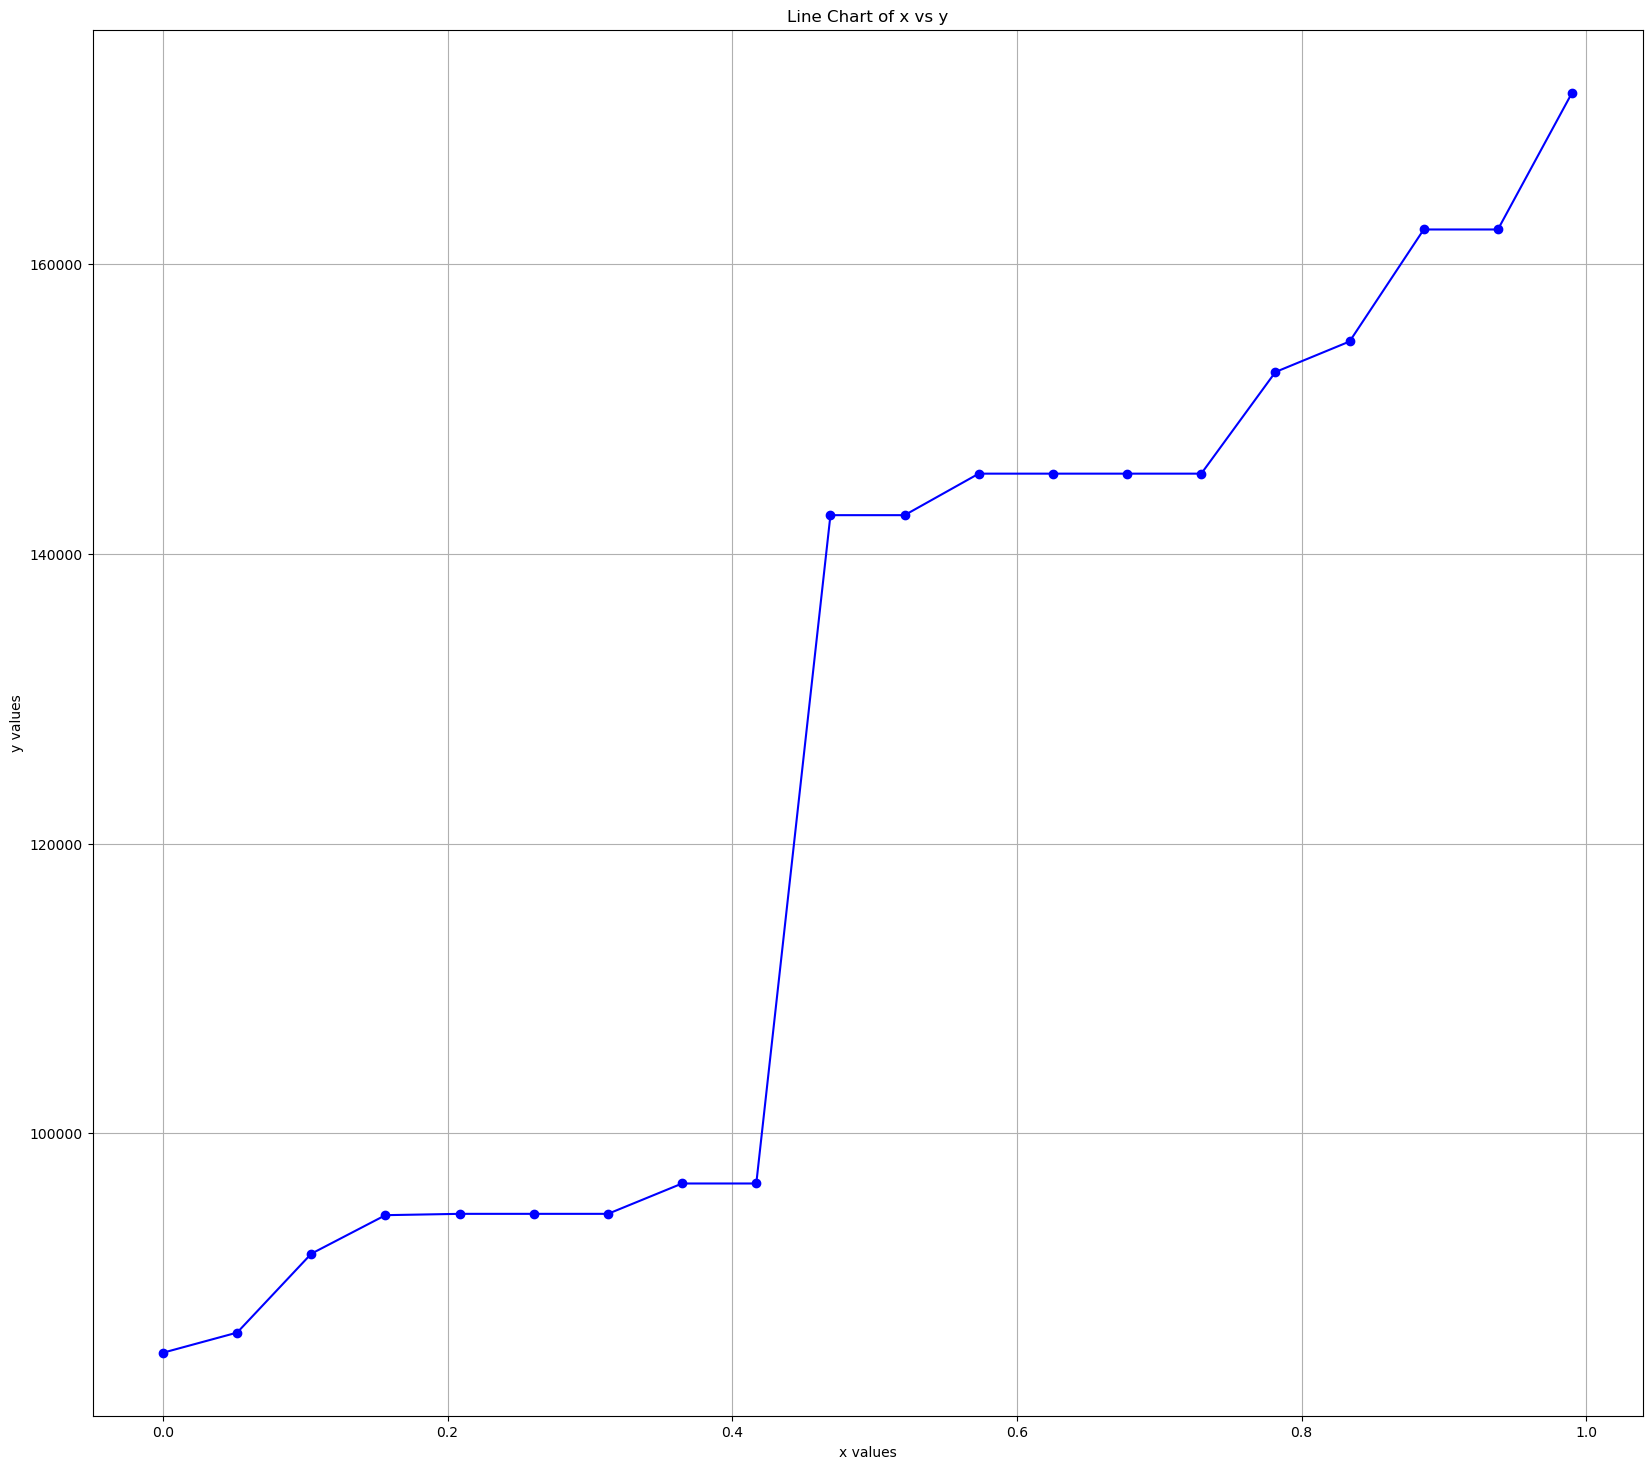

In [18]:
plt.figure(figsize=(20, 18))
plt.plot(numbers, mae_knn, 'o-', color='blue')
plt.title('Line Chart of x vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid(True)
plt.show()

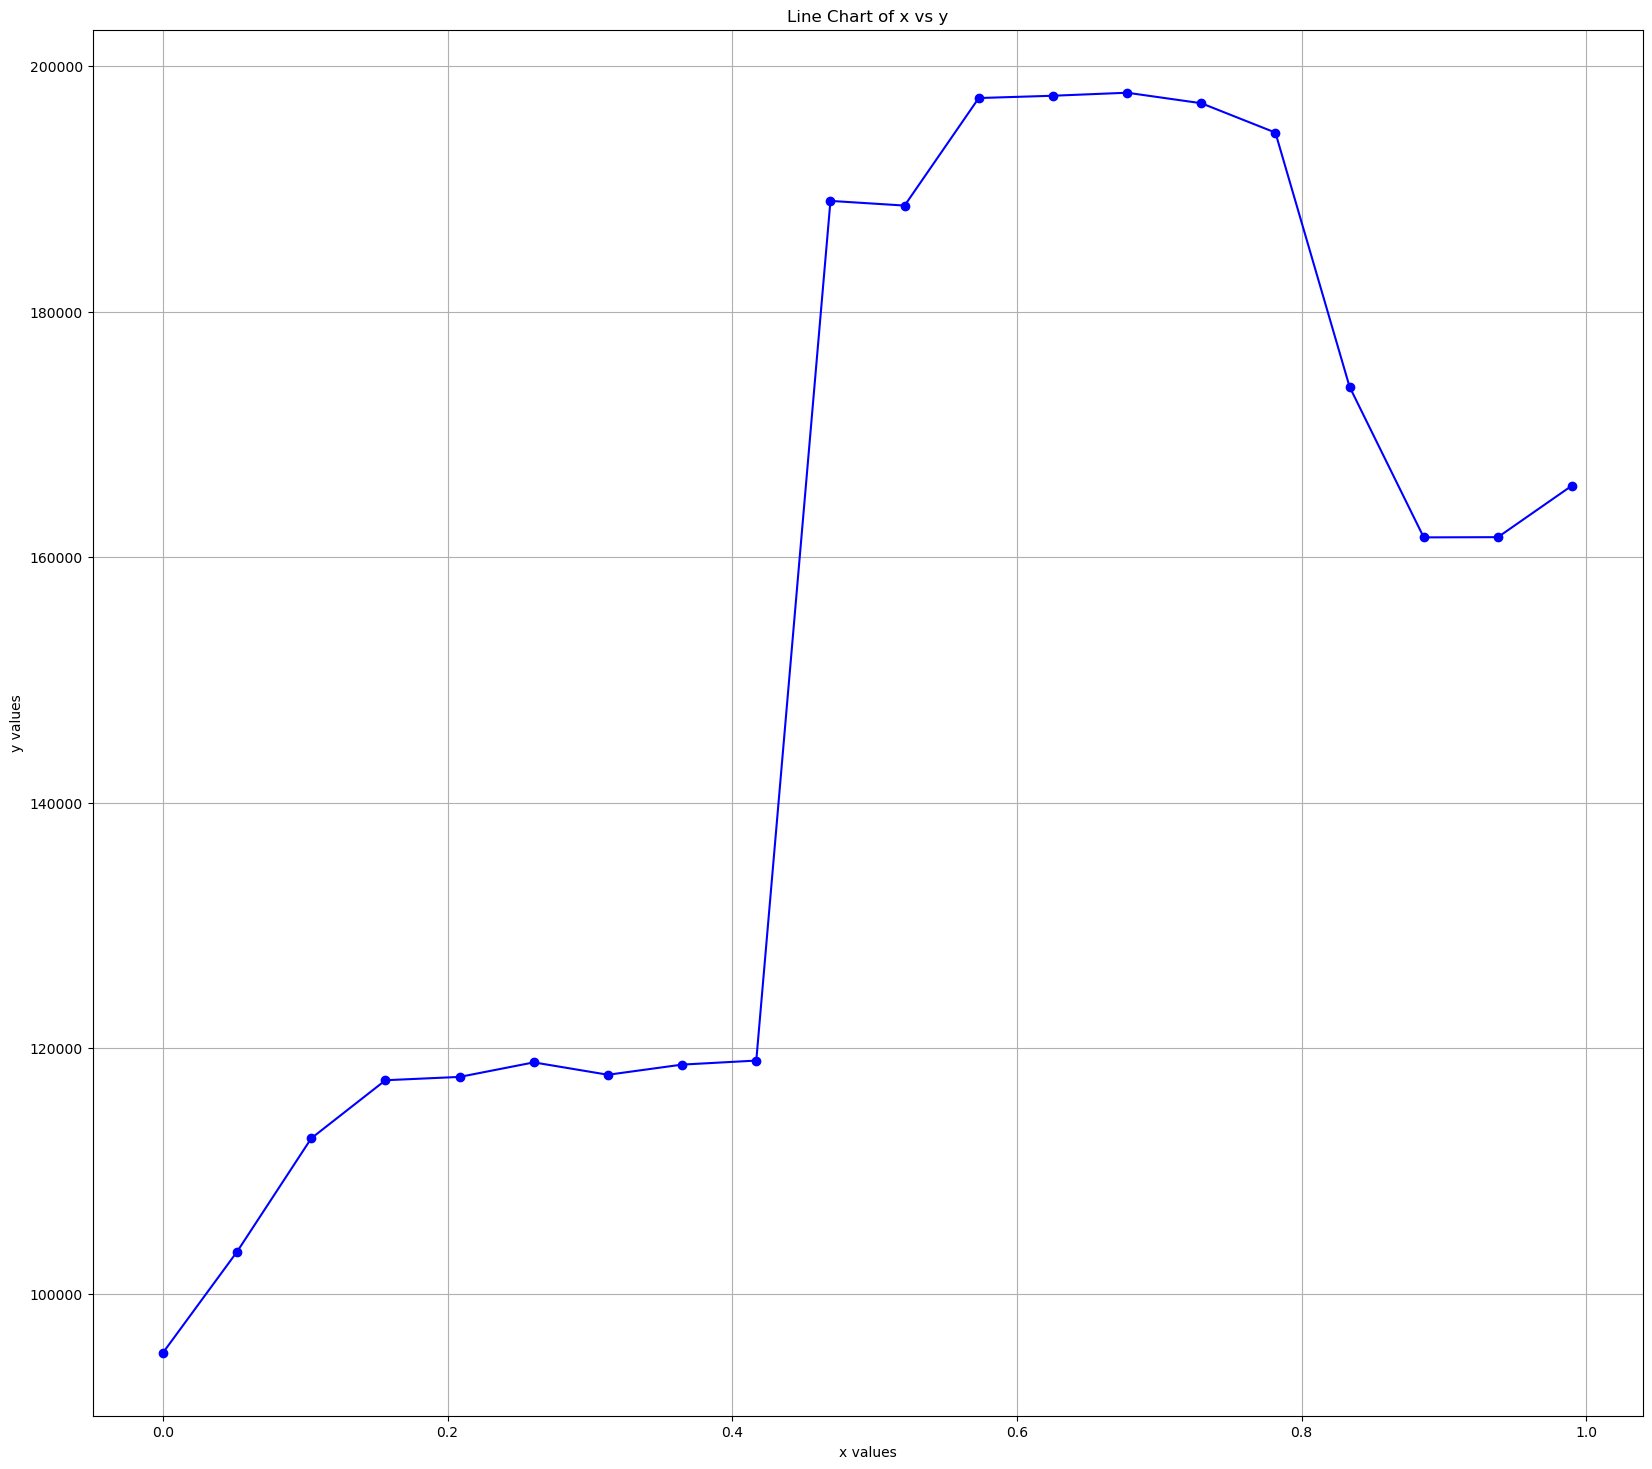

In [19]:
plt.figure(figsize=(20, 18))
plt.plot(numbers, mae_detree, 'o-', color='blue')
plt.title('Line Chart of x vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid(True)
plt.show()